In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]



# SAMPLE STEPS THAT CAN BE USED: FIRST OF TRY AND CREATE THE  type
type(documents)

list

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
X = vectorizer.fit_transform(documents)

In [4]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],)
    print

Top terms per cluster:
Cluster 0:
 user
 eps
 interface
 human
 response
 time
 computer
 management
 engineering
 testing
Cluster 1:
 graph
 trees
 minors
 survey
 paths
 intersection
 unordered
 binary
 generation
 random


In [6]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

#tSVD = TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7,
       # random_state=42, tol=0.0).fit(X)
pca = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=50, random_state=42, tol=0.0).fit(X)

data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1] )
plt.show()  

C:\Users\ansja001\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\ansja001\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\ansja001\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


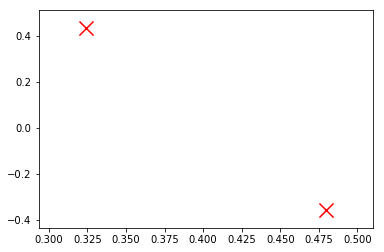

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.show()    